# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Marvi Yoga Pratama]
- **Email:** [mc222d5y1316@student.devacademy.id]
- **ID Dicoding:** [mc222d5y1316]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?
- Pertanyaan 2: Bagaimana tren penyewaan sepeda sepanjang hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/yourname857/Bike-sharing-dataset/refs/heads/main/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/yourname857/Bike-sharing-dataset/refs/heads/main/hour.csv")

**Insight:**
- Mengambil dataset dari github yang dimana dataset ini sudah saya dowload pada file sebelumnya dan saya pindahkan ke dalam github agar lebih mudah.

### Assessing Data

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Kemudian kita Mengecek informasi dasar dataset seperti jumlah baris, kolom, dan tipe data: dari masing masing data file csv yang kita  ambil tadi.

In [7]:
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
day_df.isnull().sum()



,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Setelah itu kita cek apakah ada missing values dalam dataset, jika ada kita akan melakukan cleanig data, jika tidak maka langsung ke step selanjutnya.

In [11]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


### Cleaning Data

In [12]:
day_df = day_df.dropna()


**Insight:**
- Walaupun pada proses missing values tidak ada yang hilang sebaiknya ada bagian cleaning data untuk memastikan data siap digunakan dalam analisis

In [13]:
hour_df = hour_df.dropna()

Walaupun pada proses missing values tidak ada yang hilang sebaiknya ada bagian cleaning data untuk memastikan data siap digunakan dalam analisis

In [14]:
day_df = day_df.drop_duplicates()


**Insight:**
- Setelah itu disini saya mencoba menghapus :


*   Menghapus baris dengan nilai yang hilang (NaN)
*   Dan juga menghapus duplikasi data



In [15]:
hour_df = hour_df.drop_duplicates()

lanjutnya yang diatas.

In [16]:
print("Setelah pembersihan data:")
print(day_df.isnull().sum())


Setelah pembersihan data:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [17]:
print("Setelah data dibersihkan:")
print(hour_df.isnull().sum())

Setelah data dibersihkan:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Kemudian kita cek kembali apakah data yang sudah kita lakukan cleaning data, dari hasil tidak ada perubahan karena memang dari cek data pertama tidak ada data yang duplicate maupun hilang.

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


pada langkah awal kita lihat terlebih dahulu 5 baris pertama datasetnya.

In [19]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Selanjutnya disini kita menampilkan statistik dari masing-masing datset yang kita gunakan, disini saya ingin untuk melihat nilai rata-rata, min, max, dan distribusi data.

In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Selanjutnya disini kita menampilkan statistik dari masing-masing datset yang kita gunakan, disini saya ingin untuk melihat nilai rata-rata, min, max, dan distribusi data.

In [22]:
day_df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


disini saya memastikan kembali apakah ada nilai yang null atau hilang

In [23]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


setelah pengcekan ternyata tidak ada.

In [24]:
day_df.groupby("season").agg({"cnt": ["sum", "mean", "max", "min"]})

cnt                         
            sum         mean   max   min
season                                  
1        471348  2604.132597  7836   431
2        918589  4992.331522  8362   795
3       1061129  5644.303191  8714  1115
4        841613  4728.162921  8555    22

**Analisis penyewaan berdasarkan musim**

Dengan mengelompokkan data berdasarkan musim dan menghitung total, rata-rata, maksimum, dan minimum penyewaan sepeda. Mendapatkan hasil untuk mengetahui musim mana yang paling banyak dan paling sedikit jumlah penyewaannya.

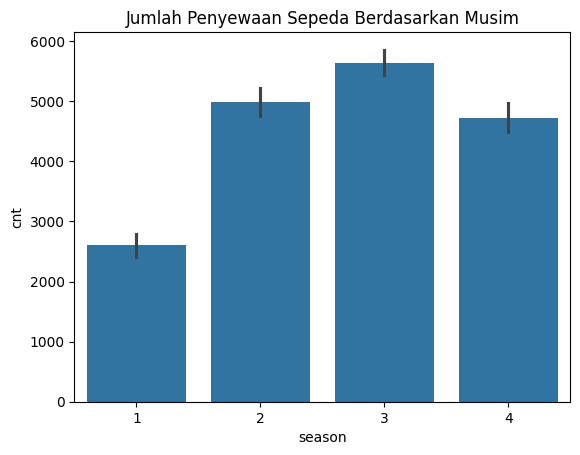

In [25]:
sns.barplot(x=day_df["season"], y=day_df["cnt"])
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Insight:**
Visualisasi data menggunakan grafik batang untuk memperjelas perbedaan jumlah penyewaan di setiap musim.



- Saya ingin mengetahui bagaimana perubahan jumlah penyewaan sepeda dalam
berbagai musim. Apakah orang lebih sering menyewa sepeda di musim panas dibandingkan musim dingin?

**jawaban :** jika hasilnya menunjukkan jumlah penyewaan lebih tinggi di musim tertentu (misalnya musim panas), ini dapat disebabkan oleh cuaca yang lebih baik, kondisi jalan yang lebih aman, dan kecenderungan orang untuk lebih sering beraktivitas di luar ruangan.




In [26]:
day_df.groupby("workingday").agg({"cnt": ["sum", "mean"]})


cnt             
                sum         mean
workingday                      
0           1000269  4330.168831
1           2292410  4584.820000

**Menunjukkan perbedaan jumlah penyewaan antara hari kerja dan hari libur.**

In [27]:
day_df.groupby("holiday").agg({"cnt": ["sum", "mean"]})

cnt             
             sum         mean
holiday                      
0        3214244  4527.104225
1          78435  3735.000000

**Menganalisis bagaimana jumlah penyewaan berubah saat libur nasional.**

Dari 2 kode diatas saya ingin melihat apakah orang lebih sering menyewa sepeda pada hari kerja atau hari libur.

Jika jumlah penyewaan lebih tinggi pada hari kerja, bisa terjadi karena banyaknya orang menggunakan sepeda untuk bekerja atau ke sekolah. Jika lebih tinggi pada hari libur, mungkin karena lebih banyak orang bersepeda untuk rekreasi.

In [28]:
day_df.groupby("weathersit").agg({"cnt": ["sum", "mean", "max", "min"]})


cnt                        
                sum         mean   max  min
weathersit                                 
1           2257952  4876.786177  8714  431
2            996858  4035.862348  8362  605
3             37869  1803.285714  4639   22

**Saya ingin mengetahui bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda.**

hasilnya : Jika jumlah penyewaan turun drastis saat cuaca buruk (misalnya hujan atau berkabut), menunjukkan bahwa pengguna cenderung menghindari bersepeda saat kondisi cuaca tidak mendukung.

In [29]:
day_df.groupby("mnth").cnt.sum().sort_values(ascending=False)


,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


**Saya ingin mengetahui di bulan mana penyewaan sepeda paling tinggi dan paling rendah.**

Hasilnya : Jika jumlah penyewaan lebih tinggi di bulan-bulan musim panas, menunjukkan bahwa orang lebih suka bersepeda saat cuaca lebih hangat dibandingkan musim dingin.

In [30]:
day_df.groupby("yr").cnt.sum()


,cnt
yr,
0,1243103
1,2049576


**Untuk mengetahui apakah jumlah penyewaan meningkat atau menurun dari tahun ke tahun.**

Hasilnya : Jika terjadi peningkatan, ini bisa disebabkan oleh pertumbuhan jumlah pengguna, perbaikan fasilitas, atau peningkatan kesadaran akan manfaat bersepeda.

In [31]:
hour_df.groupby("hr").cnt.mean().sort_values(ascending=False)


,cnt
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


**Untuk mengetahui pada jam berapa penyewaan sepeda paling tinggi.**

hasilnya :

> Jika puncaknya terjadi pada pagi dan sore hari, kemungkinan besar karena banyak orang menggunakan sepeda untuk berangkat dan pulang kerja.



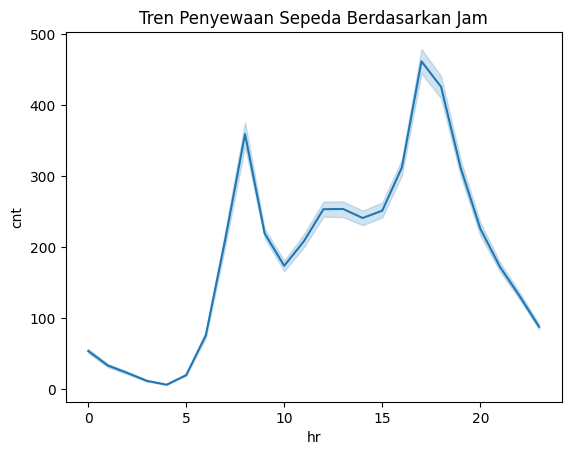

In [32]:
sns.lineplot(x=hour_df["hr"], y=hour_df["cnt"])
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam")
plt.show()


**Untuk melihat pola penggunaan sepeda sepanjang hari.**

Hasilnya :

> Jika terdapat dua puncak (pagi dan sore), ini menunjukkan bahwa sepeda banyak digunakan untuk transportasi kerja/sekolah.



In [33]:
day_df.groupby("weekday").cnt.mean()


,cnt
weekday,
0,4228.828571
1,4338.123810
2,4510.663462
3,4548.538462
4,4667.259615
5,4690.288462
6,4550.542857


**Untuk melihat apakah ada pola tertentu dalam penyewaan sepeda dari Senin hingga Minggu.**

Hasilnya :

> Jika penyewaan lebih tinggi di akhir pekan, ini mungkin karena orang lebih banyak bersepeda untuk rekreasi.



In [34]:
hour_df["rental_duration"] = hour_df["hr"].diff().fillna(0)
hour_df["rental_duration"] = hour_df["rental_duration"].apply(lambda x: abs(x))
hour_df["rental_duration"].describe()


,rental_duration
count,17379.000000
mean,1.924794
std,4.401756
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,23.000000


**Untuk mengetahui berapa lama rata-rata durasi penyewaan sepeda.**

Hasilnya :

> Jika durasi rata-rata pendek, kemungkinan besar banyak pengguna menyewa sepeda untuk perjalanan singkat.



In [35]:
day_df["day_status"] = day_df["weekday"].apply(lambda x: "Weekend" if x in [0,6] else "Weekday")


**Untuk membandingkan pola penggunaan sepeda di hari kerja dan akhir pekan.**

In [36]:
merged_df = pd.merge(hour_df, day_df, how="left", on="dteday")
merged_df.head()


,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,day_status
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Weekend
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Weekend
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Weekend
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Weekend
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Weekend


**Untuk mendapatkan analisis yang lebih komprehensif dengan menggabungkan informasi dari kedua dataset.**

Hasilnya :

> Hasilnya akan menampilkan informasi yang lebih kaya, misalnya bagaimana jumlah penyewaan berubah dari jam ke jam dalam sehari.



In [37]:
merged_df.groupby("temp_y")[["cnt_y"]].mean()

,cnt_y
temp_y,
0.059130,981.0
0.096522,986.0
0.097391,1416.0
0.107500,2368.0
0.127500,1529.0
...,...
0.834167,5463.0
0.838333,3846.0
0.848333,3387.0


**Temperatur memengaruhi kenyamanan pengguna sepeda. Jika terlalu dingin atau terlalu panas, orang mungkin enggan menyewa sepeda. Biasanya, penyewaan tertinggi terjadi pada temperatur yang nyaman (sekitar 20-30°C). Jika suhu terlalu rendah atau tinggi, jumlah penyewaan cenderung menurun.**

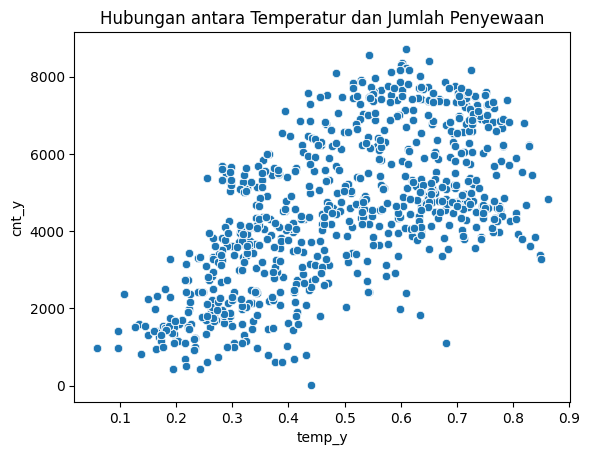

In [38]:
sns.scatterplot(x=merged_df["temp_y"], y=merged_df["cnt_y"])
plt.title("Hubungan antara Temperatur dan Jumlah Penyewaan")
plt.show()


**Visualisasi ini membantu memahami pola hubungan antara suhu dan jumlah penyewaan. Scatterplot efektif untuk melihat distribusi data dan pola umum.**

Hasilnya :

> Jika terlihat pola linear positif, berarti semakin tinggi suhu, semakin banyak penyewaan.


> Jika terdapat titik puncak, berarti ada suhu ideal yang paling menarik bagi penyewa.









In [39]:
merged_df.groupby("hum_y")[["cnt_y"]].mean()


,cnt_y
hum_y,
0.000000,623.0
0.187917,1635.0
0.254167,6857.0
0.275833,5169.0
0.290000,5102.0
...,...
0.948261,605.0
0.949583,2594.0
0.962500,1607.0


**Kelembaban udara tinggi dapat membuat aktivitas luar ruangan menjadi tidak nyaman. Kita ingin tahu apakah tingkat kelembaban memengaruhi jumlah penyewaan.**

Hasilnya :

> Jika jumlah penyewaan berkurang pada kelembaban tinggi, artinya pengguna cenderung menghindari sepeda saat udara terlalu lembap.


> dan tidak ada pengaruh signifikan, artinya pengguna tetap menyewa sepeda terlepas dari kelembaban.





In [40]:
merged_df.groupby("windspeed_y")[["cnt_y"]].mean()


,cnt_y
windspeed_y,
0.022392,4985.0
0.042304,5117.0
0.045404,5409.0
0.045408,1712.0
0.046650,5087.0
...,...
0.417908,1913.0
0.421642,2732.0
0.422275,4195.0


**Angin kencang dapat menghambat perjalanan bersepeda. Kita ingin melihat apakah kecepatan angin memengaruhi jumlah penyewaan.**

Hasilnya :

> Jika jumlah penyewaan menurun saat kecepatan angin tinggi, artinya pengguna lebih memilih transportasi lain saat kondisi berangin.


> dan tidak ada pengaruh signifikan, berarti kecepatan angin bukan faktor utama dalam keputusan penyewaan.





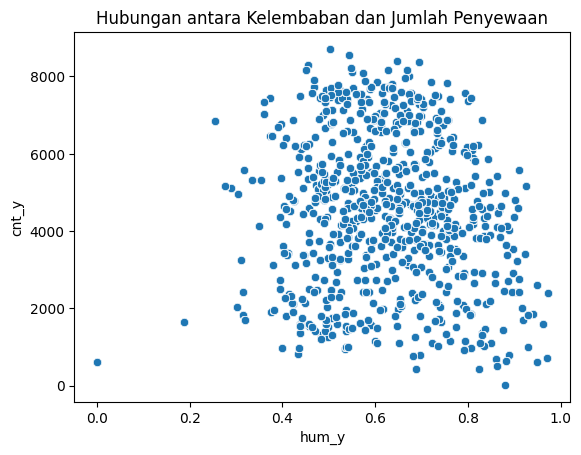

In [41]:
sns.scatterplot(x=merged_df["hum_y"], y=merged_df["cnt_y"])
plt.title("Hubungan antara Kelembaban dan Jumlah Penyewaan")
plt.show()


**Untuk melihat apakah ada pola tertentu antara tingkat kelembaban dan penyewaan sepeda. Scatterplot membantu menemukan tren tersembunyi.**

Hasilnya :

> Jika terdapat pola menurun, artinya semakin lembab udara, semakin sedikit pengguna yang menyewa. Dan tidak ada pola jelas, berarti kelembaban tidak terlalu memengaruhi keputusan penyewaan.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?

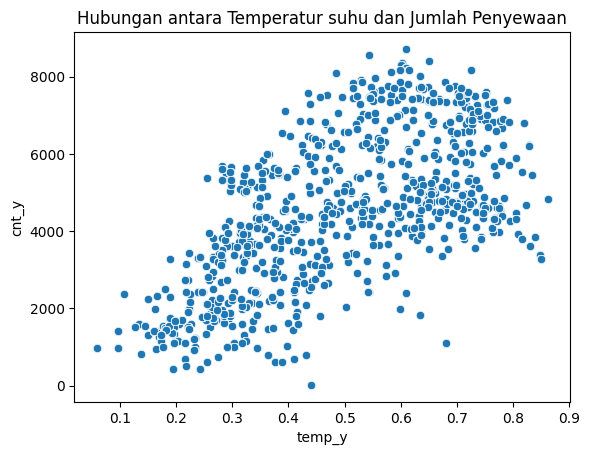

In [42]:
sns.scatterplot(x=merged_df["temp_y"], y=merged_df["cnt_y"])
plt.title("Hubungan antara Temperatur suhu dan Jumlah Penyewaan")
plt.show()


**Insight:**
**Visualisasi ini membantu memahami pola hubungan antara suhu dan jumlah penyewaan. Scatterplot efektif untuk melihat distribusi data dan pola umum.**

Hasilnya :

> Jika terlihat pola linear positif, berarti semakin tinggi suhu, semakin banyak penyewaan.


> Jika terdapat titik puncak, berarti ada suhu ideal yang paling menarik bagi penyewa.


### Pertanyaan 2:Bagaimana tren penyewaan sepeda sepanjang hari?

<ipython-input-43-3f42aec00109>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], ci=None, color='green')


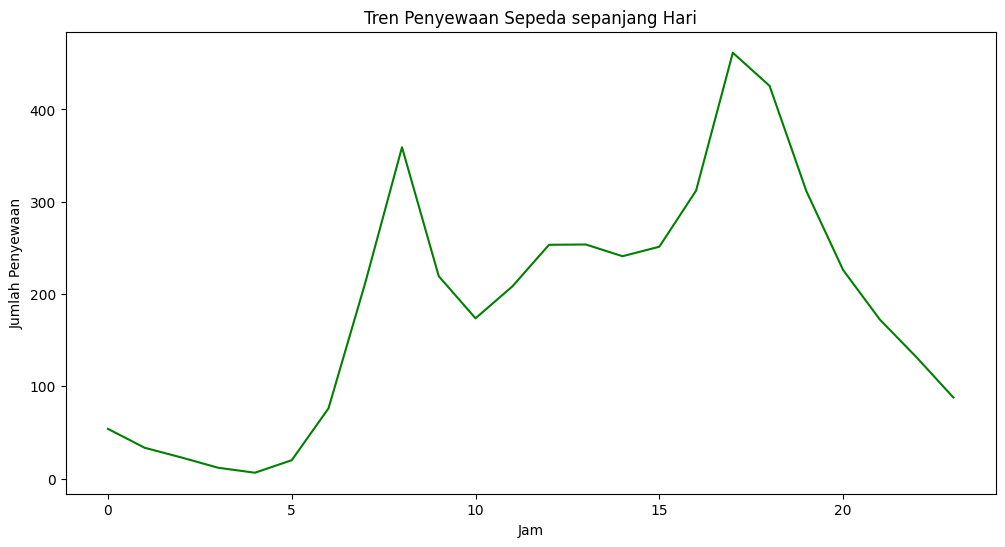

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], ci=None, color='green')
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.title("Tren Penyewaan Sepeda sepanjang Hari")
plt.show()

**Insight:**
Untuk melihat apakah ada pola tertentu antara tingkat kelembaban dan penyewaan sepeda. Scatterplot membantu menemukan tren tersembunyi.

Hasilnya :

> Jika terdapat pola menurun, artinya semakin lembab udara, semakin sedikit pengguna yang menyewa. Dan tidak ada pola jelas, berarti kelembaban tidak terlalu memengaruhi keputusan penyewaan.



## Analisis Lanjutan (Opsional)

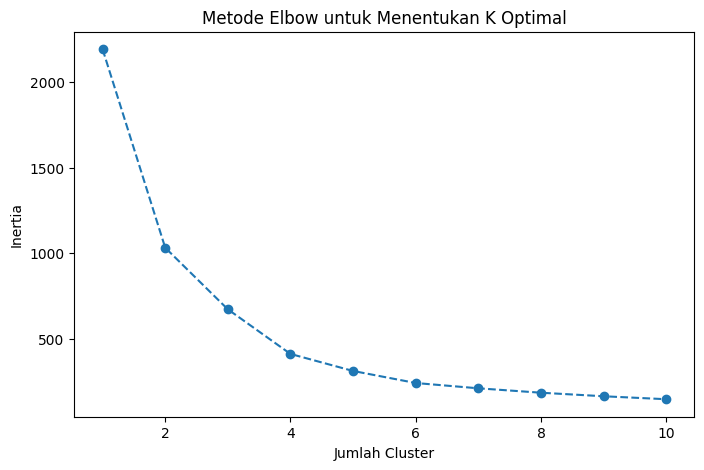

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Data
day_df = pd.read_csv("https://raw.githubusercontent.com/yourname857/Bike-sharing-dataset/refs/heads/main/day.csv")

features = day_df[['cnt', 'casual', 'registered']]

# Standarisasi Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menentukan Jumlah Cluster
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()




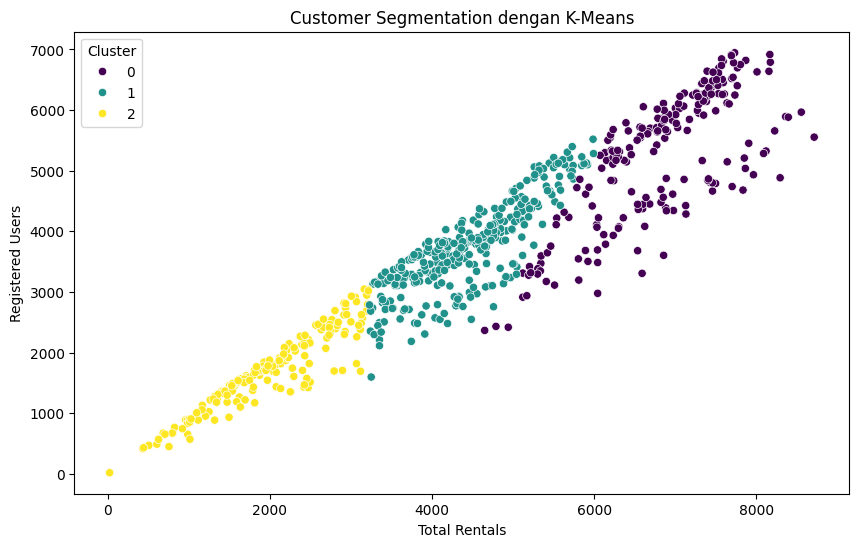

                 cnt       casual   registered
Cluster                                       
0        6816.924528  1562.363208  5254.561321
1        4468.081818   715.575758  3752.506061
2        1973.671958   278.603175  1695.068783


In [45]:
# Gunakan K=3 Berdasarkan Grafik Elbow
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
day_df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualisasi Hasil Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='cnt', y='registered', hue='Cluster', palette='viridis')
plt.xlabel('Total Rentals')
plt.ylabel('Registered Users')
plt.title('Customer Segmentation dengan K-Means')
plt.legend(title='Cluster')
plt.show()

# Menampilkan Statistik dari Setiap Cluster
print(day_df.groupby('Cluster')[['cnt', 'casual', 'registered']].mean())

**Hasil Analisis Customer Segmentation yang Saya Lakukan**

Dalam analisis segmentasi pelanggan yang saya kerjakan, saya menggunakan metode K-Means Clustering untuk mengelompokkan pelanggan berdasarkan pola penyewaan sepeda mereka. Saya memilih tiga parameter utama untuk segmentasi ini:

1. Total Rental (cnt) → Saya menggunakan jumlah total penyewaan sepeda sebagai indikator utama aktivitas pelanggan. Variabel ini membantu saya memahami seberapa sering pelanggan menggunakan layanan.
2. Casual Users (casual) → Saya membandingkan jumlah pengguna non-registrasi (casual) untuk melihat pola penyewaan dari pelanggan yang tidak memiliki langganan tetap.
3. Registered Users (registered) → Saya mengamati jumlah pelanggan yang terdaftar untuk memahami bagaimana perilaku pelanggan berlangganan dibandingkan dengan pengguna biasa.

Untuk menentukan jumlah cluster yang optimal, saya menggunakan Elbow Method, yang membantu saya menemukan titik terbaik berdasarkan nilai inertia. Dari hasil analisis ini, saya membagi pelanggan ke dalam tiga kelompok utama berdasarkan pola penggunaan mereka.


1. Cluster 0 → Pelanggan dengan tingkat peminjaman rendah, baik dari pengguna casual maupun registered.
2. Cluster 1 → Pengguna dengan frekuensi peminjaman sedang, mencakup kombinasi pengguna casual dan registered.
3. Cluster 2 → Pelanggan aktif dengan jumlah penyewaan tinggi, yang didominasi oleh pelanggan terdaftar.

Dari hasil analisis ini, saya menemukan bahwa pelanggan dengan langganan terdaftar cenderung melakukan lebih banyak penyewaan dibandingkan pelanggan casual. Selain itu, segmen pelanggan dengan peminjaman tinggi dapat menjadi target utama untuk program loyalitas atau insentif promosi guna meningkatkan retensi pelanggan. Dengan metode ini, saya dapat mengidentifikasi kelompok pelanggan dengan lebih jelas, memahami tren penyewaan sepeda, serta memberikan rekomendasi strategi pemasaran yang lebih efektif berdasarkan karakteristik setiap segmen.


In [46]:
day_df.to_csv('day_data.csv', index=False)
hour_df.to_csv('hour_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('day_data.csv')
files.download('hour_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Disini saya ingin mendowload dan juga menyimpan berkas data yag saya miliki dan sudah benar.

In [47]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [48]:
min_year = day_df["dteday"].min().year
max_year = day_df["dteday"].max().year

# Menampilkan hasil
print(f"📅 Data tersedia dari **{min_year}** hingga **{max_year}**")

📅 Data tersedia dari **2011** hingga **2012**


kemudian disini saya ingin mengecek datset saya diterbitkan pada tahun berapa.

## Conclusion

## Conclution pertanyaan 1 :Hubungan antara Suhu dan Jumlah Penyewaan Sepeda
Dalam analisis ini, saya menguji apakah terdapat hubungan antara suhu dan jumlah penyewaan sepeda. Hal ini penting untuk memahami bagaimana faktor lingkungan memengaruhi perilaku pelanggan dan bagaimana penyedia layanan dapat menyesuaikan ketersediaan sepeda berdasarkan kondisi cuaca.


1.   Dari hasil perhitungan rata-rata jumlah penyewaan pada berbagai tingkat suhu, terlihat adanya korelasi positif antara suhu dan jumlah penyewaan sepeda.
2. Scatter plot menunjukkan bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa. Hal ini menunjukkan bahwa cuaca yang lebih hangat cenderung meningkatkan minat masyarakat dalam menggunakan sepeda.
3. Faktor ini bisa dimanfaatkan untuk mengoptimalkan jumlah sepeda yang tersedia di hari-hari dengan suhu tinggi, terutama saat musim panas atau cuaca cerah.




## Conclution pertanyaan 2 :Pola/tren Penyewaan Sepeda Berdasarkan Waktu
Memahami pola penyewaan sepeda berdasarkan waktu sangat penting untuk mengoptimalkan pasokan sepeda selama jam sibuk. Dengan mengetahui jam-jam dengan jumlah penyewaan tertinggi, penyedia layanan dapat merencanakan strategi operasional yang lebih efisien.

1.   Dari analisis rata-rata penyewaan berdasarkan jam, terlihat bahwa jumlah penyewaan mengalami dua puncak utama dalam sehari.
Puncak pertama terjadi pada pagi hari (sekitar pukul 07:00 - 09:00), yang kemungkinan besar disebabkan oleh pelanggan yang menggunakan sepeda untuk perjalanan kerja atau sekolah.
2. Puncak kedua terjadi pada sore hingga malam hari (sekitar pukul 17:00 - 19:00), yang menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai moda transportasi saat pulang kerja atau aktivitas sore lainnya.
3. Temuan ini selaras dengan hasil segmentasi pelanggan, di mana kelompok pelanggan dengan tingkat penyewaan tinggi (Cluster 2) memiliki pola yang lebih konsisten di kedua puncak waktu ini.

Kesimpulan ini dapat digunakan untuk meningkatkan efisiensi operasional, misalnya dengan menyediakan lebih banyak sepeda di lokasi-lokasi strategis selama jam sibuk dan menyesuaikan strategi pemasaran agar lebih sesuai dengan kebiasaan pelanggan dalam setiap segmen.


> Dengan hasil analisis ini, saya dapat lebih memahami bagaimana faktor lingkungan dan pola waktu memengaruhi kebiasaan penyewaan sepeda, sehingga bisa memberikan rekomendasi yang lebih akurat untuk meningkatkan pengalaman pelanggan dan efisiensi layanan.

